In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [ ]:
#lo vamos a usar despues
numero_test = test_data.iloc[0:200, 0]
matriz_sin_numero_test = test_data.iloc[0:200, 1:785]
numero_train = train_data.iloc[0:2000, 0]
matriz_sin_numero_train = train_data.iloc[0:2000, 1:785]

Ejercicio 1

In [ ]:
#1. a
def imagen(n,train):
  digito = train.iloc[n, 0]
  digito_img = train.iloc[n, 1:]
  digito_img = digito_img.values.reshape(28,28)
  plt.imshow(digito_img, cmap= "gray")
  plt.title("Digito %i" %digito)
#n es el numero de la fila que sera graficada

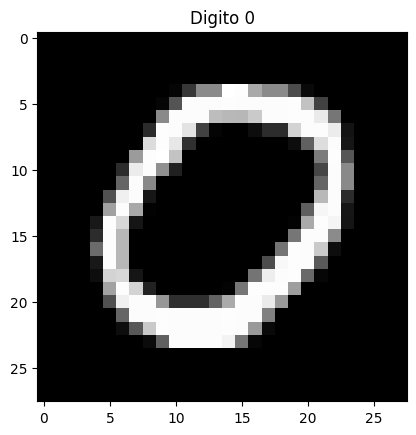

In [ ]:
imagen(789,train_data)

In [ ]:
#1 b
def cantidad_imagenes_train(n,train):
  digitos = [0,1,2,3,4,5,6,7,8,9]
  resultado = [0,0,0,0,0,0,0,0,0,0]
  for i in range(train.shape[0]):
    for j in range(10):
      if train.iloc[i,0]==digitos[j]:
        resultado[j] = resultado[j]+1
  return resultado[n]

In [ ]:
print("hay", cantidad_imagenes_train(0,train_data), "imagenes del digito 0 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(1,train_data), "imagenes del digito 1 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(2,train_data), "imagenes del digito 2 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(3,train_data), "imagenes del digito 3 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(4,train_data), "imagenes del digito 4 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(5,train_data), "imagenes del digito 5 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(6,train_data), "imagenes del digito 6 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(7,train_data), "imagenes del digito 7 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(8,train_data), "imagenes del digito 8 en el conjunto de entrenamiento")
print("hay", cantidad_imagenes_train(9,train_data), "imagenes del digito 9 en el conjunto de entrenamiento")


hay 801 imagenes del digito 0 en el conjunto de entrenamiento
hay 907 imagenes del digito 1 en el conjunto de entrenamiento
hay 792 imagenes del digito 2 en el conjunto de entrenamiento
hay 816 imagenes del digito 3 en el conjunto de entrenamiento
hay 803 imagenes del digito 4 en el conjunto de entrenamiento
hay 705 imagenes del digito 5 en el conjunto de entrenamiento
hay 802 imagenes del digito 6 en el conjunto de entrenamiento
hay 854 imagenes del digito 7 en el conjunto de entrenamiento
hay 757 imagenes del digito 8 en el conjunto de entrenamiento
hay 800 imagenes del digito 9 en el conjunto de entrenamiento


In [ ]:
def cantidad_imagenes_test(n,test):
  digitos = [0,1,2,3,4,5,6,7,8,9]
  resultado = [0,0,0,0,0,0,0,0,0,0]
  for i in range(test.shape[0]):
    for j in range(10):
      if test.iloc[i,0]==digitos[j]:
        resultado[j] = resultado[j]+1
  return resultado[n]

In [ ]:
print("hay", cantidad_imagenes_test(0,test_data), "imagenes del digito 0 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(1,test_data), "imagenes del digito 1 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(2,test_data), "imagenes del digito 2 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(3,test_data), "imagenes del digito 3 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(4,test_data), "imagenes del digito 4 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(5,test_data), "imagenes del digito 5 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(6,test_data), "imagenes del digito 6 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(7,test_data), "imagenes del digito 7 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(8,test_data), "imagenes del digito 8 en el conjunto de testeo")
print("hay", cantidad_imagenes_test(9,test_data), "imagenes del digito 9 en el conjunto de testeo")

hay 542 imagenes del digito 0 en el conjunto de testeo
hay 659 imagenes del digito 1 en el conjunto de testeo
hay 606 imagenes del digito 2 en el conjunto de testeo
hay 576 imagenes del digito 3 en el conjunto de testeo
hay 578 imagenes del digito 4 en el conjunto de testeo
hay 524 imagenes del digito 5 en el conjunto de testeo
hay 537 imagenes del digito 6 en el conjunto de testeo
hay 588 imagenes del digito 7 en el conjunto de testeo
hay 567 imagenes del digito 8 en el conjunto de testeo
hay 598 imagenes del digito 9 en el conjunto de testeo


In [ ]:
#1 c
#hicimos una funcion que calcule la cantidad de imagenes como el punto anterior pero con las primeras x cantidad de imagenes del conjunto de entrenamiento para despues usarla en promedio
def cantidad_imagenes_trainx(n,train,x):
  digitos = [0,1,2,3,4,5,6,7,8,9]
  resultado = [0,0,0,0,0,0,0,0,0,0]
  for i in range(x):
    for j in range(10):
      if train.iloc[i,0]==digitos[j]:
        resultado[j] = resultado[j]+1
  return resultado[n]

#sumamos todas las imagenes del digito de entrada n sin la primera columna en un vector suma y despues lo dividimos por la cantidad de imagenes que fueron sumadas(promedio)

def promedio(n,train,x):
  suma = np.zeros(784)
  sinNumero = train.iloc[0:x, 1:785]
  numero = train.iloc[0:x, 0]
  for j in range(x):
    if n == numero[j]:
      matriz = sinNumero.iloc[j].values
      suma = np.add(suma,matriz)
  promedio_fila = suma / cantidad_imagenes_trainx(n,train,x)
  return promedio_fila

#junta las imagenes promedio de todos los digitos en una lista

def promedio_imagenes(train,x):
  resultado = []
  for i in range(10):
    resultado.append(promedio(i,train,x))
  return resultado


In [ ]:
print(promedio(4,train_data,2000)) #Ejemplo con el digito 4

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
promedios = promedio_imagenes(train_data,2000)
#guardamos los promedios en una lista para poder acceder mas rapido a ellos y que las fuciones que necesitan calcularlo no tengan que hacerlo una y otra vez

In [ ]:
#1 d
#graficamos todas las imagenes promedio
def graficar_imagenes(train):
  fig, axes = plt.subplots(2, 5, figsize=(10, 4))
  for i in range(10):
    im =pd.Series(promedios[i])
    imagen_promedio = im.values
    digito_img = imagen_promedio.reshape(28,28)
    plt.imshow(digito_img, cmap= "gray")
    plt.title("Imagen promedio %i" %i)
    row = i // 5
    col = i % 5
    axes[row, col].imshow(digito_img, cmap="gray")
    axes[row, col].set_title("Imagen promedio %i" % i)

  plt.tight_layout()
  plt.show()

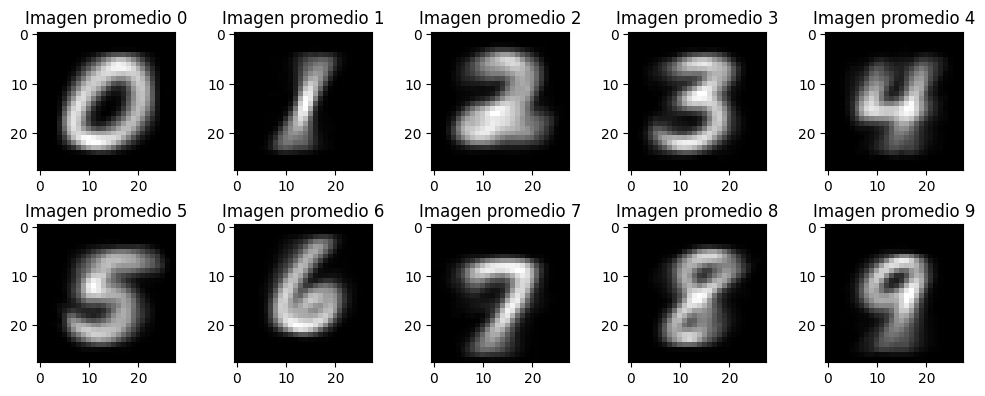

In [ ]:
graficar_imagenes(train_data)

In [ ]:
#2 a
#para cada imagen del conjunto de testeo calculamos su distancia euclidea con todas las imagenes promedio y nos quedamos con la menor,
#agregamos el indice a una lista ya que eso sera el numero que estamos predijiendo que representa esa imagen
def distanciaEuclidea(test,x):
  listaDePredicciones = []
  sinNumero = test.iloc[0:x,1:785]
  for i in range(x):
    distancias = []
    for j in range(10):
      distancia_euclidea = np.linalg.norm(promedios[j] - sinNumero.iloc[i].values)
      distancias.append(distancia_euclidea)
    minima = distancias.index(min(distancias))
    listaDePredicciones.append(minima)
  return listaDePredicciones


In [ ]:
print(distanciaEuclidea(test_data,200))

[2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 2, 9, 0, 1, 5, 4, 7, 5, 4, 9, 6, 4, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 1, 5, 5, 5, 2, 4, 4, 6, 3, 5, 5, 2, 5, 4, 1, 9, 1, 7, 8, 9, 2, 7, 9, 2, 4, 3, 0, 7, 0, 2, 8, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 4, 4, 7, 5, 6, 1, 3, 6, 9, 3, 1, 4, 5, 1, 6, 9, 4, 0, 5, 4, 4, 9, 2, 1, 9, 4, 8, 1, 5, 9, 7, 9, 9, 4, 9, 7, 3, 6, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 4, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 4, 3, 4, 5, 1, 9, 9, 7, 3, 5, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 3, 3, 0, 1, 1, 5, 0, 9, 0, 5, 1, 6, 9, 2, 3]


In [ ]:
#2.b
#hacemos el calculo de la precision con una suma de todos los casos en los cuales la prediccion fue correcta dividida por la cantidad total de predicciones
def precision(predicciones,test,x):
  casosAciertos = 0
  numero = test.iloc[0:x, 0]
  for i in range(len(predicciones)):
    if predicciones[i] == numero[i]:
      casosAciertos +=1
  precision = casosAciertos / len(predicciones)
  return precision


In [ ]:
print(precision(distanciaEuclidea(test_data,200),test_data,200))

0.77


In [ ]:
#2 c
#imprimimos todos los casos que no acertaron para elegir algunas de esas imagenes y graficarlas para la conclusion
def casos_no_acertados(predicciones,test,x):
  noAciertos = []
  numero = test.iloc[0:x, 0]
  for i in range(len(predicciones)):
    if predicciones[i] != numero[i]:
      noAciertos.append(i)
  return noAciertos

In [ ]:
print(casos_no_acertados(distanciaEuclidea(test_data,200),test_data,200))

[7, 10, 15, 17, 21, 37, 42, 43, 45, 53, 54, 58, 62, 64, 65, 72, 76, 79, 83, 86, 95, 96, 99, 103, 110, 111, 114, 115, 118, 119, 120, 148, 150, 163, 164, 168, 169, 171, 172, 174, 183, 185, 186, 190, 194, 197]


Text(0.5, 1.0, 'Digito 5')

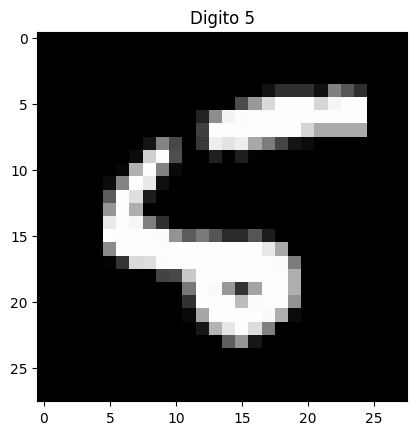

In [ ]:
digito = test_data.iloc[7, 0]
digito_img = test_data.iloc[7, 1:]
digito_img = digito_img.values.reshape(28,28)
plt.imshow(digito_img, cmap= "gray")
plt.title("Digito %i" %digito)

Text(0.5, 1.0, 'Digito 9')

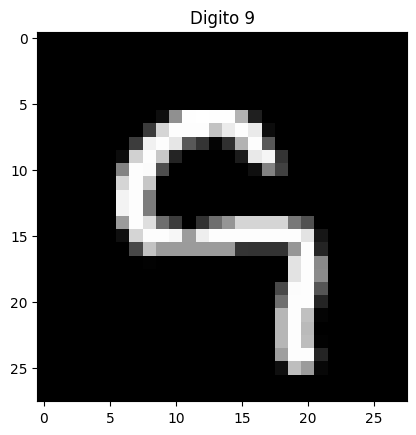

In [ ]:
digito = test_data.iloc[103, 0]
digito_img = test_data.iloc[103, 1:]
digito_img = digito_img.values.reshape(28,28)
plt.imshow(digito_img, cmap= "gray")
plt.title("Digito %i" %digito)

Text(0.5, 1.0, 'Digito 4')

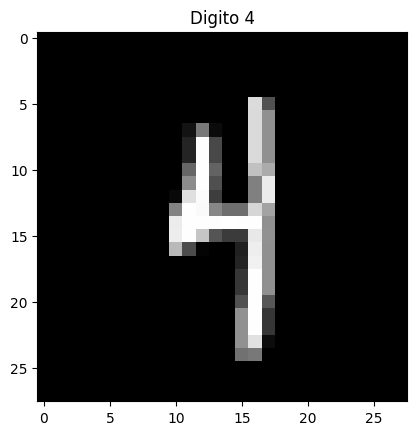

In [ ]:
digito = test_data.iloc[64, 0]
digito_img = test_data.iloc[64, 1:]
digito_img = digito_img.values.reshape(28,28)
plt.imshow(digito_img, cmap= "gray")
plt.title("Digito %i" %digito)

¿Considera
buena la precision?

Por lo que vemos en algunos de los casos en los que la prediccion no fue acertada, hay imagenes que a simple vista se reconoce el numero sin necesidad de saber su etiqueta, por lo que podrian haber sido contados dentro de los casos acertados, gracias a eso nosotros consideramos que la precision no es buena porque hay un gran margen de error. Si pensamos en que tenemos 1 millon de imagenes hay 230 mil que estan quedando afuera al ser una precision del 77%, y si bien es menos de la mitad, es un numero bastante grande para el proposito de este trabajo.


In [ ]:
#3
#usamos el metodo de la potencia para calular el autovector asociado al autovalor de mayor valor con un metodo que usa la descomposicon svd para un solo autovector
def svd_potencia(A):
    epsilon = 1e-10
    n = A.shape[0]
    m = A.shape[1]
    x = np.random.rand(min(n,m))
    x /= np.linalg.norm(x)
    vectork0 = np.zeros(min(n,m))
    vectork1 = x
    if (n > m):
        B = np.transpose(A) @ A
    else:
        B = A @ np.transpose(A)
    while (np.abs(vectork1 @ vectork0) < (1 - epsilon)):
        vectork0 = vectork1
        vectork1 = B @ vectork0
        vectork1 /= np.linalg.norm(vectork1)
    return vectork1

#calculamos la descomposicionSVD de A usando la funcion anterior calculando vector a vector la svd
#para el primer autovector vamos calculando sigma, v y u
#dependiendo de si n > m o no, calcula el autovector u y el autovector v normalizados y los agrega a la lista svd
#asi sucesivamente con todos los vectores y despues de calcular uno "resta" la dimension del que ya calculo
#devuelve las matrices de autovectores izquierdos (us), los valores singulares (valoresSingulares) y las matrices de autovectores derechos (vs)
def descomposicionSVD(A):
    A = np.array(A, dtype=float)
    n = A.shape[0]
    m = A.shape[1]
    svd = []
    k = min(n, m)
    for i in range (k):
        matriz1dimension = A.copy()
        for valorSingular, u, v in svd[:i]:
            matriz1dimension -= valorSingular * np.outer(u, v)
        if (n > m):
            v = svd_potencia(matriz1dimension)
            u_sinNormalizar = A @ v
            sigma = np.linalg.norm(u_sinNormalizar)
            u = u_sinNormalizar / sigma
        else:
            u = svd_potencia(matriz1dimension)
            v_sinNormalizar = np.transpose(A) @ u
            sigma = np.linalg.norm(v_sinNormalizar)
            v = v_sinNormalizar / sigma
        svd.append((sigma, u, v))
    valoresSingulares, us, vs = [np.array(x) for x in zip(*svd)]
    return np.transpose(us), valoresSingulares, vs


In [ ]:
print(descomposicionSVD(np.array([[10,0,0],[0,5,0],[0,0,1]]))) #ejemplo

(array([[ 1.00000000e+00, -2.81061606e-06,  1.76043212e-13],
       [ 2.81061606e-06,  1.00000000e+00, -6.26351080e-08],
       [ 2.90246178e-20,  6.26351080e-08,  1.00000000e+00]]), array([10.,  5.,  1.]), array([[ 1.00000000e+00,  1.40530803e-06,  2.90246178e-21],
       [-5.62123212e-06,  1.00000000e+00,  1.25270216e-08],
       [ 1.76043212e-12, -3.13175540e-07,  1.00000000e+00]]))


In [ ]:
#4a
#da la matriz correspondiente a cada dıgito de dimension 785 × cantidad imagenes del digito en las primeras x imagenes del conjunto de entrenamiento
def matrizDe(n,train,x):
  conjunto =[]
  numero = train.iloc[0:x, 0]
  for j in range(x):
    if n == numero.iloc[j]:
      f = train.iloc[j].values.reshape((785,1))
      conjunto.append(f)
  return conjunto

#junta las 10 matrices en una misma funcion
def listaDeMatrices(train,x):
  listaDeMatrices =[]
  for i in range(10):
    listaDeMatrices.append(matrizDe(i,train,x))
  return listaDeMatrices

#aca las apila por columna
def listaDeMatricesApiladas(train,x):
  M=[]
  for i in range (10):
    columnas = listaDeMatrices(train,x)[i]
    M.append(np.column_stack(columnas))
  return M


#obtenemos la matriz de cada digito pero sin la primer columna, de dimension 784 × cantidad imagenes de cada digito
def imagenSinClasificacion(n,train,x):
  conjunto =[]
  numero = train.iloc[0:x, 0]
  sinNumero = train.iloc[0:x, 1:785]
  for j in range(x):
    if n == numero.iloc[j]:
      f = sinNumero.iloc[j].values.reshape((784,1))
      conjunto.append(f)
  return conjunto

#armamos la lista con las matrices Mi, i=0,..,9
def listaSinClasificacion(train,x):
  listaDeMatricesSinDigito =[]
  for i in range(10):
    listaDeMatricesSinDigito.append(imagenSinClasificacion(i,train,x))
  return listaDeMatricesSinDigito

#las apilamos
def matricesSinClasificacionApiladas(train,x):
  M=[]
  for i in range (10):
    columnas = listaSinClasificacion(train,x)[i]
    M.append(np.column_stack(columnas))
  return M


In [ ]:
#ejemplo de los tamaños para el digito 0
print(len(listaDeMatricesApiladas(train_data,2000)[0]))
print(len(listaDeMatricesApiladas(train_data,2000)[0][0]))
print(len(listaDeMatricesApiladas(train_data,2000)))


785
191
10


In [ ]:
Mi09 = matricesSinClasificacionApiladas(train_data,2000)

In [ ]:
#4.b

#descomposicion de todas las matrices Mi al mismo tiempo
def descomposicionSVDDeTodasMatrices(l):
  Ui = []
  sigmai = []
  Vi = []
  for i in range(len(l)):
    descomposicion = descomposicionSVD(l[i])
    Ui.append(descomposicion[0])
    sigmai.append(descomposicion[1])
    Vi.append(descomposicion[2])
  return Ui, sigmai, Vi

In [ ]:
print(descomposicionSVDDeTodasMatrices(Mi09))

([array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0

In [ ]:
#tarda 2/3 minutos en cargar por lo que lo cargamos una vez, guardamos los valores y luego los utilizamos sin la necesidad de que cargue de nuevo
#guardamos los valores en variables para no tener que esperar que carguen cada vez que se usan en alguna funcion
descomposicionMatrices = descomposicionSVDDeTodasMatrices(Mi09)
U0 = descomposicionMatrices[0][0]
U1 = descomposicionMatrices[0][1]
U2 = descomposicionMatrices[0][2]
U3 = descomposicionMatrices[0][3]
U4 = descomposicionMatrices[0][4]
U5 = descomposicionMatrices[0][5]
U6 = descomposicionMatrices[0][6]
U7 = descomposicionMatrices[0][7]
U8 = descomposicionMatrices[0][8]
U9 = descomposicionMatrices[0][9]


In [ ]:
U = [U0,U1,U2,U3,U4,U5,U6,U7,U8,U9]

In [ ]:
#4.c
#graficos de la primer columna de Ui
#representan los graficos de la imagen promedio, son iguales
def muestro1erColumnaU():
  fig, axes = plt.subplots(2, 5, figsize=(10, 4))
  for i in range(10):
    matrizU = U[i]
    columna1 = matrizU[:, 0]
    imagen = columna1.reshape((28, 28))
    row = i // 5
    col = i % 5
    axes[row, col].imshow(imagen, cmap="gray")
    axes[row, col].set_title("Primer columna %i" % i)

  plt.tight_layout()
  plt.show()

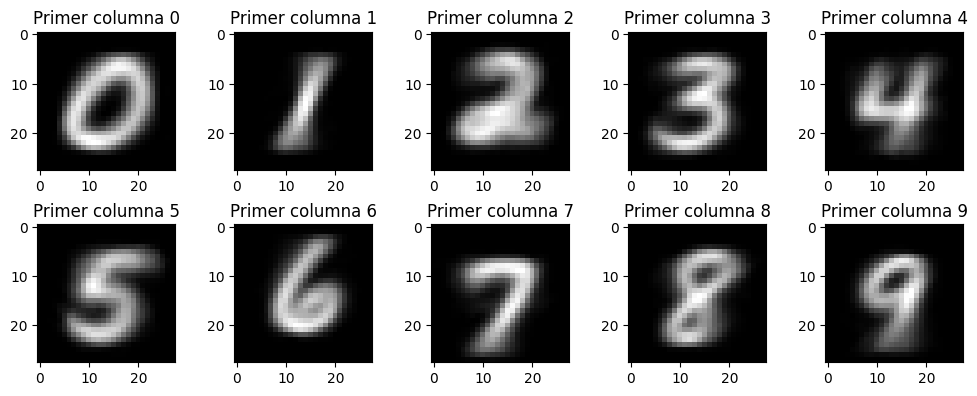

In [ ]:
muestro1erColumnaU()

In [ ]:
#4.d
def muestro2daColumnaU():
  fig, axes = plt.subplots(2, 5, figsize=(10, 4))
  for i in range(10):
    matrizU = U[i]
    columna2 = matrizU[:, 1]
    imagen = columna2.reshape((28, 28))
    row = i // 5
    col = i % 5
    axes[row, col].imshow(imagen, cmap="gray")
    axes[row, col].set_title("Segunda columna %i" % i)

  plt.tight_layout()
  plt.show()

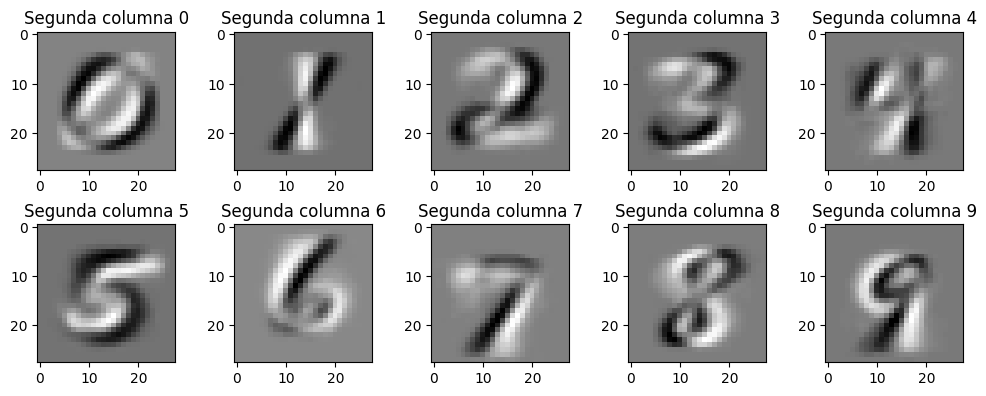

In [ ]:
muestro2daColumnaU()

In [ ]:
#4.d
def muestro3raColumnaU():
  fig, axes = plt.subplots(2, 5, figsize=(10, 4))
  for i in range(10):
    matrizU = U[i]
    columna3 = matrizU[:, 2]
    imagen = columna3.reshape((28, 28))
    row = i // 5
    col = i % 5
    axes[row, col].imshow(imagen, cmap="gray")
    axes[row, col].set_title("Tercera columna %i" % i)

  plt.tight_layout()
  plt.show()

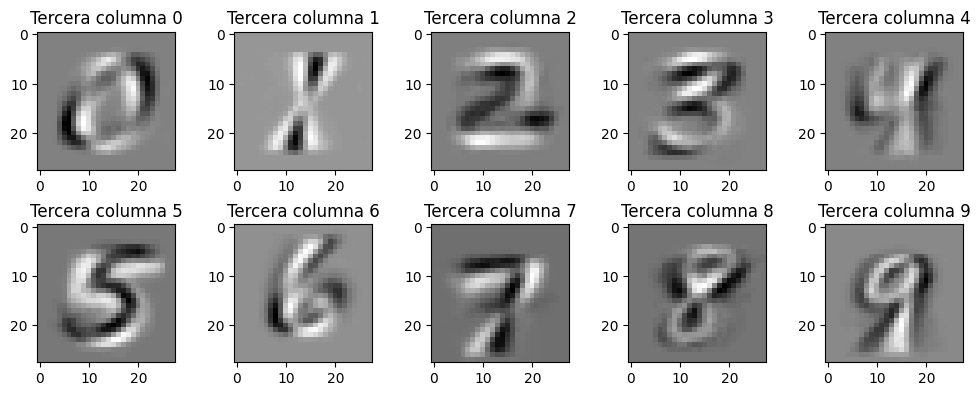

In [ ]:
muestro3raColumnaU()

Las diferencias entre estas imagenes y las de la primer columna son que estas son una especie de construccion de la imagen promedio porque tienen la misma silueta pero con una mayor tonalidad de grises y a medida que mas te alejas mas grises tiene y mas variacion hay entre los blancos y negros. Estas diferencias se deben a los diferentes modos de iluminación o estructuras principales que capturan las columnas de U en la svd. Cada columna de U captura componentes cada vez menos importantes de la imagen original, representando un modo distinto de iluminacion, por eso varian los negros, blancos y grises en cada imagen. La primer columna representa la iluminacion promedio de la imagen en cambio el resto representan modos distintos y estructuras aidicionales.


In [ ]:
#4.e
def Uk(u,k):
  return u[:,:k]

def proyeccionOrtogonal(u,k):
  U = Uk(u,k)
  proyeccion = U @ np.transpose(U)
  return proyeccion

def residuo(u,k,imagen):
  U = proyeccionOrtogonal(u,k)
  x = np.array(imagen)
  residuo = np.linalg.norm(x - U @ x)
  return residuo

def minimosResiduos(U,k,test,x):
 casosTotales = x
 residuosK = []
 listaDeMinimosResiudos = []
 sinNumero = test.iloc[0:x, 1:785]
 for j in range(x):
   residuosK = []
   for i in range(10):
     r = residuo(U[i],k,sinNumero.iloc[j].values)
     residuosK.append(r)
   x= min(residuosK)
   p=np.argmin(residuosK)
   listaDeMinimosResiudos.append(p)

 return listaDeMinimosResiudos

def precisionResiduos(U,test,x):
  listaDeResiduos = []
  for k in range(1,6):
    ki = precision(minimosResiduos(U,k,test,x),test,x)
    listaDeResiduos.append(ki)
  return listaDeResiduos

def precisionResiduosPorRango(U,test,x):
  r = precisionResiduos(U,test,x)
  for i in range(5):
    print("Para el rango de k =",i+1, "la precision es",r[i])


In [ ]:
precisionResiduos(U,test_data,200)

[0.77, 0.87, 0.925, 0.94, 0.945]

In [ ]:
precisionResiduosPorRango(U,test_data,200)

Para el rango de k = 1 la precision es 0.77
Para el rango de k = 2 la precision es 0.87
Para el rango de k = 3 la precision es 0.925
Para el rango de k = 4 la precision es 0.94
Para el rango de k = 5 la precision es 0.945


In [ ]:
#5
print(precision(distanciaEuclidea(test_data,200),test_data,200))
print(precisionResiduos(U,test_data,200))

0.77
[0.77, 0.87, 0.925, 0.94, 0.945]


Finalmente comparar los resultados obtenidos para la precision entre los ejercicios 2 y 4. ¿Que puede
observar?

Se puede observar que para el menor k la precision es la misma que en el ejercicio 2, lo que se ve tambien en el grafico de la primer columna de las U que es igual a los graficos de las imagenes promedio para las cuales ya habiamos comprobado que su precision no era muy buena, y a medida que el k aumenta cada vez hay mejor precision debido a que se pueden ver y comparar mejor las imagenes porque hay mas posibilidades y se da lugar a que tome mas cosas que en k=1 estan mas restringidas por eso hay menos casos acertados. Se puede afirmar que el metodo svd a mayor rango es la mejor forma de aproximar las imagenes de entrenamiento a las de testeo ya que hay menor pérdida de información: La aproximación mediante la descomposición SVD conserva la mayor cantidad de información posible de las imágenes originales. A diferencia de una imagen promedio, que podría eliminar detalles y características específicas de las imágenes individuales, la descomposición SVD captura múltiples componentes que representan diferentes aspectos y variaciones presentes en el conjunto, esto permite una mejor conservación de la información y una reconstrucción más fiel de las imágenes originales. La descomposición SVD permite capturar diferentes modos de variabilidad y adaptarse a la diversidad del conjunto, cosa que un en un promedio puede perderse.

In [ ]:
#imprimimos los casos no acertados para cada k para ver en cuales dio distitno y en cuales igual
print(casos_no_acertados(minimosResiduos(U,1,test_data,200),test_data,200))
print(casos_no_acertados(minimosResiduos(U,2,test_data,200),test_data,200))
print(casos_no_acertados(minimosResiduos(U,3,test_data,200),test_data,200))
print(casos_no_acertados(minimosResiduos(U,4,test_data,200),test_data,200))
print(casos_no_acertados(minimosResiduos(U,5,test_data,200),test_data,200))

[7, 8, 10, 14, 15, 17, 21, 32, 37, 45, 52, 53, 54, 58, 62, 64, 65, 72, 76, 77, 79, 86, 91, 95, 96, 103, 110, 114, 115, 118, 120, 148, 150, 151, 158, 163, 168, 169, 171, 174, 183, 185, 188, 190, 194, 197]
[7, 23, 32, 45, 53, 54, 60, 64, 71, 72, 76, 79, 82, 96, 109, 110, 115, 118, 151, 158, 168, 169, 171, 174, 183, 197]
[3, 7, 32, 53, 62, 76, 79, 82, 83, 96, 110, 118, 151, 171, 192]
[3, 7, 17, 32, 43, 64, 72, 76, 79, 82, 83, 171]
[3, 7, 8, 26, 32, 72, 76, 79, 115, 171, 192]


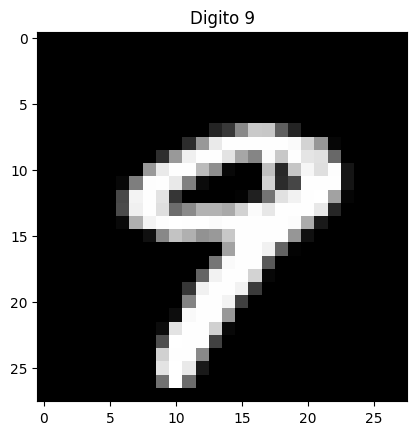

In [ ]:
imagen(8,test_data) #fallo para k = 1 y k = 5 pero para el resto no

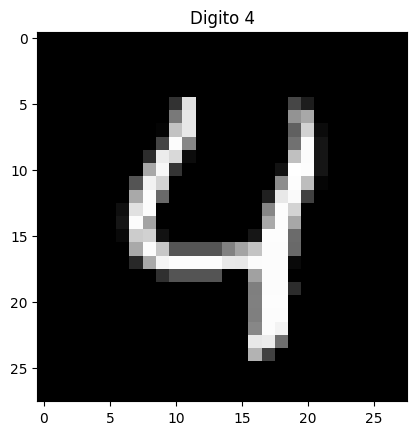

In [ ]:
imagen(3, test_data) #fallo para k = 3,4,5

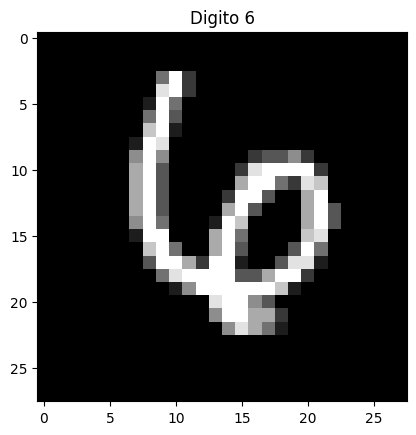

In [ ]:
imagen(21, test_data) #solo fallo para k =1